<a href="https://colab.research.google.com/github/TechRoC/Image_Caption_Generator/blob/master/Model_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from pickle import load
from numpy import argmax
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import *
from keras.layers import *
from keras.models import Model
# extract features from each photo in the directory
def extract_features(filename):
	# load the model
	model = InceptionResNetV2()
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	# load the photo
	image = load_img(filename, target_size=(299, 299))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# load the tokenizer
tokenizer = load(open('/content/drive/My Drive/tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 30
# load the model
model = load_model('/content/drive/My Drive/caption_model/model_17.h5')
# load and prepare the photograph


Let's Test The Model Prediction

In [16]:
#from IPython.display import  Image
from PIL import Image



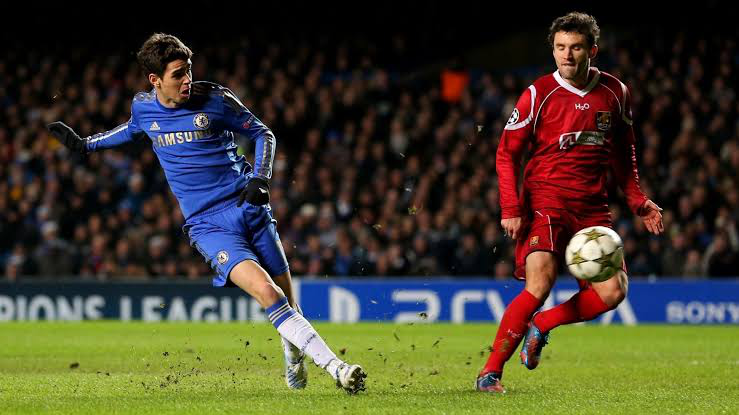

In [20]:
image = Image.open('/content/drive/My Drive/Glove/images (41).jpeg ')
image

In [21]:
photo = extract_features('/content/drive/My Drive/Glove/images (41).jpeg ')
description = generate_desc(model, tokenizer, photo, max_length)
print(description)

startseq two men are playing soccer in field endseq


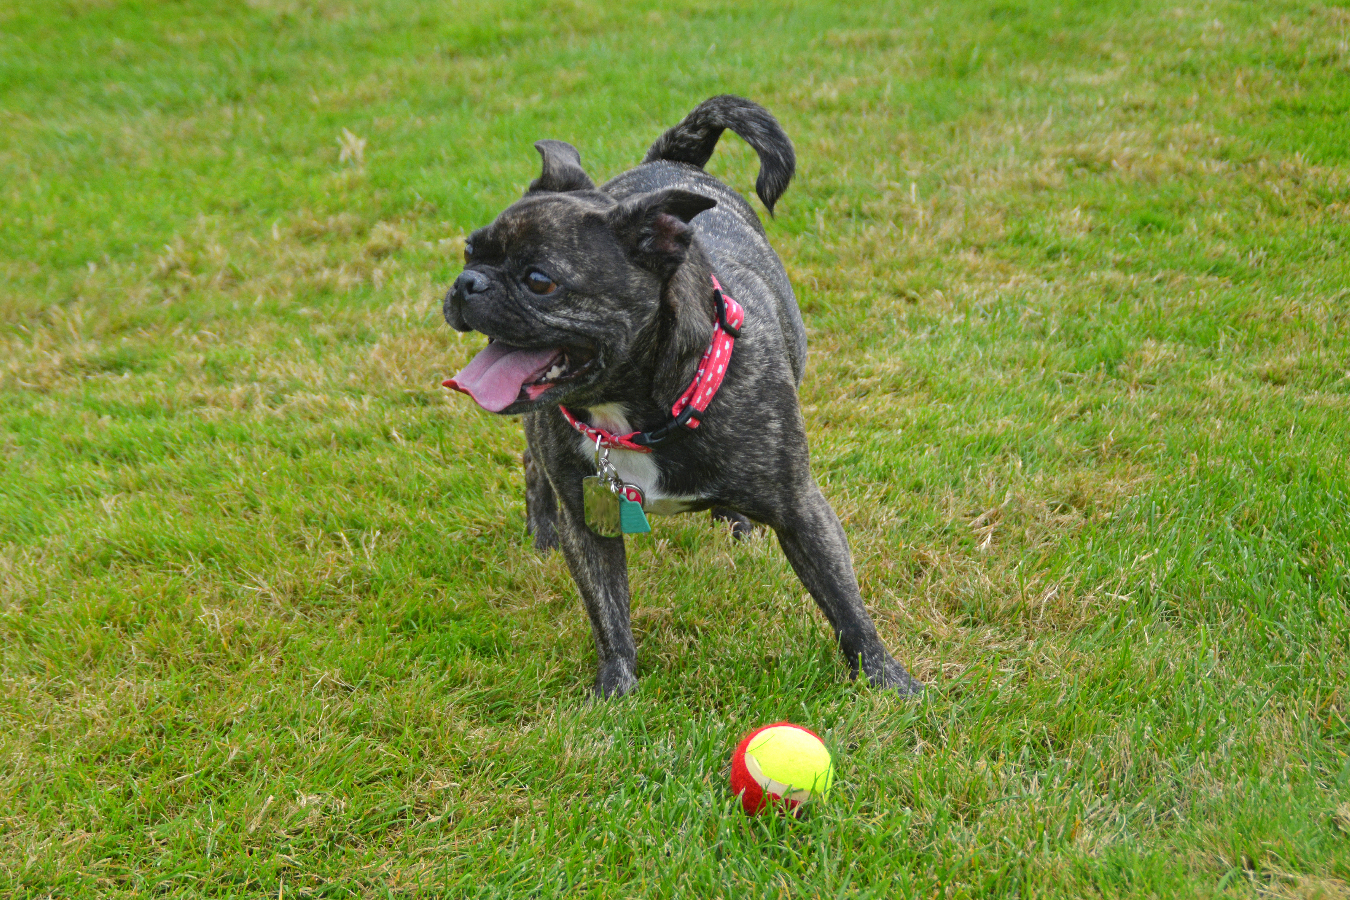

In [22]:
image = Image.open('/content/drive/My Drive/32960815185_437066df93_o.jpg')
image

In [23]:
photo = extract_features('/content/drive/My Drive/32960815185_437066df93_o.jpg')
description = generate_desc(model, tokenizer, photo, max_length)
print(description)

startseq dog is running through grass endseq
